In [1]:
### PACKAGES
import csv
import numpy as np
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
### CONSTANTS
ROOTPATH = './'
IMG_HEIGHT = 490
IMG_WIDTH = 680
NUM_CHANNELS = 3

In [3]:
train_img_names = [] # list of train image names as strings
train_img_labels = [] # list of train images labels as tuples (latitude, longitude)
with open(ROOTPATH + 'COMP90086_2021_Project_train/train.csv') as train_csv:
    reader = csv.reader(train_csv, delimiter=',')
    next(reader) # skip header row
    for row in reader:
        name = row[0] # string
        label = [float(row[1]), float(row[2])] # list
        train_img_names.append(name)
        train_img_labels.append(label)

# train images stored as numpy array
train_size = (len(train_img_names), IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)
train_images = np.zeros(train_size, dtype='uint8')
for i in range(len(train_img_names)):
    name = train_img_names[i]
    subpath = 'COMP90086_2021_Project_train/train/' + name + '.jpg'
    img = cv2.imread(os.path.join(ROOTPATH, subpath))
    train_images[i] = img

# train labels stored as numpy array
train_labels = np.array(train_img_labels)
train_labels.shape

(7500, 2)

In [4]:
test_img_names = [] # list of test image names as strings
with open(ROOTPATH + 'COMP90086_2021_Project_test/imagenames.csv') as test_csv:
    reader = csv.reader(test_csv, delimiter=',')
    next(reader) # skip header row
    for row in reader:
        name = row[0] # string
        test_img_names.append(name)
        
# test images stored as numpy array
test_size = (len(test_img_names), IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)
test_images = np.zeros(test_size, dtype='uint8')
for i in range(len(test_img_names)):
    name = test_img_names[i]
    subpath = 'COMP90086_2021_Project_test/test/' + name + '.jpg'
    img = cv2.imread(os.path.join(ROOTPATH, subpath))
    test_images[i] = img

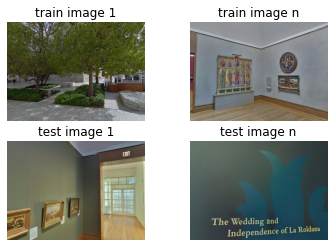

In [6]:
##CHECK
train_img_1 = cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB)
train_img_n = cv2.cvtColor(train_images[-1], cv2.COLOR_BGR2RGB)
test_img_1 = cv2.cvtColor(test_images[0], cv2.COLOR_BGR2RGB)
test_img_n = cv2.cvtColor(test_images[-1], cv2.COLOR_BGR2RGB)

plt.subplot(2,2,1)
plt.imshow(train_img_1) 
plt.title('train image 1')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(train_img_n) 
plt.title('train image n')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(test_img_1) 
plt.title('test image 1')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(test_img_n) 
plt.title('test image n')
plt.axis('off')
plt.show()

In [7]:
train_images[:7000].shape

(7000, 490, 680, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
input_layer = layers.Input((IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS))
convolutional_layer = layers.Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1))(input_layer)
max_pooling_layer = layers.MaxPooling2D((2, 2), padding='same', strides=(2, 2))(convolutional_layer)
flatten_layer = layers.Flatten()(max_pooling_layer)
fc_256_layer = layers.Dense(256, activation='relu')(flatten_layer)
output_layer = layers.Dense(10, activation='softmax')(fc_256_layer)

cnn = Model(input_layer, [output_layer, output_layer])
mlp.compile(optimizer='adam',
           loss=[tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError()],
           metrics=['accuracy'])

history_mlp = mlp.fit(train_images[:7000], train_labels[:7000], epochs=20, batch_size=100, 
                    validation_data=(train_images[7000:], train_labels[7000:]))